In [5]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy
from tqdm import tqdm
import numpy as np
from sklearn.metrics.pairwise import euclidean_distances
from random import sample 


x,y = make_classification(n_samples=10000, n_features=2, n_informative=2, n_redundant= 0, n_clusters_per_class=1, random_state=60)
X_train, X_test, y_train, y_test = train_test_split(x,y,stratify=y,random_state=42)



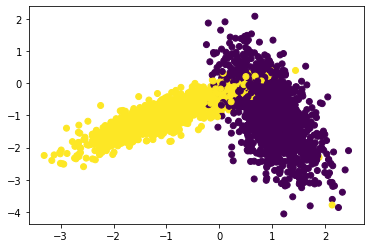

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
colors = {0:'red', 1:'blue'}
plt.scatter(X_test[:,0], X_test[:,1],c=y_test)
plt.show()

# Implementing Custom RandomSearchCV

In [18]:
# it will take classifier and set of values for hyper prameter in dict type dict({hyper parmeter: [list of values]})
# we are implementing this only for KNN, the hyper parameter should n_neighbors
from sklearn.metrics import accuracy_score

def k_fold(x_train,fold):
  ratio = int(x_train.shape[0]/folds)
  indices = []
  increment = 0
  for i in range(folds):
    sub_indices = list(range(i*increment, ratio+increment*i ))
    indices.append(sub_indices)
    increment = ratio

  y , z , r= list(), list(), list()
  for i in range(folds):
    a = folds-i-1
    y.append(indices[a])
    for j in range(folds):
      if j != a:
        r.extend(indices[j])
    z.append(r)
    r = []  

  return z, y    


def RandomSearchCV(x_train,y_train,classifier, params, folds):
    ranges = [i for i in range(params['n_neighbors'][0],params['n_neighbors'][1])]
    
    trainscores = []
    testscores  = [] 
    params_list = sorted(list(sample(ranges,10)))
  
    
    train_indices, test_indices = k_fold(x_train,folds)

    for k in tqdm(params_list):
        trainscores_folds = []
        testscores_folds  = []
        for j in range(0, folds):
            # selecting the data points based on the train_indices and test_indices
            X_train = x_train[train_indices[j]]
            Y_train = y_train[train_indices[j]]
            X_test  = x_train[test_indices[j]]
            Y_test  = y_train[test_indices[j]]


            classifier.n_neighbors = k
            classifier.fit(X_train,Y_train)

            Y_predicted = classifier.predict(X_test)
            testscores_folds.append(accuracy_score(Y_test, Y_predicted))

            Y_predicted = classifier.predict(X_train)
            trainscores_folds.append(accuracy_score(Y_train, Y_predicted))
        trainscores.append(np.mean(np.array(trainscores_folds)))
        testscores.append(np.mean(np.array(testscores_folds)))
    return trainscores,testscores ,params_list

100%|██████████████████████████████████████████| 10/10 [00:20<00:00,  2.02s/it]


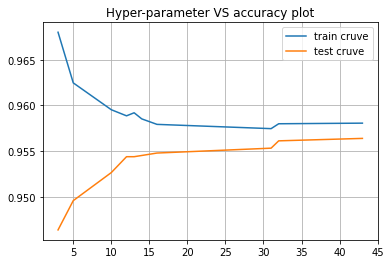

In [20]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import random
import warnings
warnings.filterwarnings("ignore")


neigh = KNeighborsClassifier()

params = {'n_neighbors':(1,50)}
folds = 3

trainscores,testscores,params_list = RandomSearchCV(X_train, y_train, neigh, params, folds)
 
plt.plot(params_list,trainscores, label='train cruve')
plt.plot(params_list,testscores, label='test cruve')
plt.grid()
plt.title('Hyper-parameter VS accuracy plot')
plt.legend()
plt.show()

In [21]:
# understanding this code line by line is not that importent 
def plot_decision_boundary(X1, X2, y, clf):
        # Create color maps
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

    x_min, x_max = X1.min() - 1, X1.max() + 1
    y_min, y_max = X2.min() - 1, X2.max() + 1
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    # Plot also the training points
    plt.scatter(X1, X2, c=y, cmap=cmap_bold)
    
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("2-Class classification (k = %i)" % (clf.n_neighbors))
    plt.show()

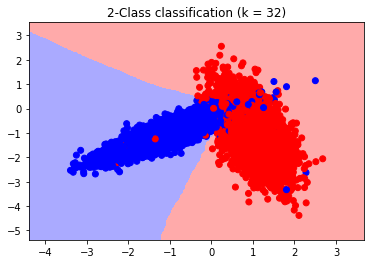

In [22]:
from matplotlib.colors import ListedColormap
neigh = KNeighborsClassifier(n_neighbors = 32)
neigh.fit(X_train, y_train)
plot_decision_boundary(X_train[:, 0], X_train[:, 1], y_train, neigh)